paso1 : importamos librerias

In [2]:
import requests
import numpy as np
import matplotlib.pyplot as plt

paso 2 : extraemos data de usuarios random

In [5]:
url = 'https://randomuser.me/api/?results=30'
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
   print(f"error en solicitud : {response.status_code}")

In [6]:
data

{'results': [{'gender': 'male',
   'name': {'title': 'Mr', 'first': 'Archie', 'last': 'Moore'},
   'location': {'street': {'number': 8026, 'name': 'Cumberland Street'},
    'city': 'Rotorua',
    'state': 'Northland',
    'country': 'New Zealand',
    'postcode': 65221,
    'coordinates': {'latitude': '49.8022', 'longitude': '-77.8405'},
    'timezone': {'offset': '+1:00',
     'description': 'Brussels, Copenhagen, Madrid, Paris'}},
   'email': 'archie.moore@example.com',
   'login': {'uuid': '187c2a89-f356-4bf5-8bdc-ccdc2b9309fc',
    'username': 'smallrabbit828',
    'password': 'popper',
    'salt': '0nuyR0vH',
    'md5': 'b073713745eafc511b274c44ef0be268',
    'sha1': '6bbddf051f21b90af0e6a55372659c2542a9e0c1',
    'sha256': '50ddf7af420dd646b59874794175eced2cfd3f09ab66e760cfb8fe3e0ba924c8'},
   'dob': {'date': '1989-07-10T06:27:10.693Z', 'age': 35},
   'registered': {'date': '2018-12-11T17:21:55.216Z', 'age': 5},
   'phone': '(175)-205-9778',
   'cell': '(886)-247-4156',
   'id': 

PASO 3 EXTRAER SEXO Y EDAD DE EL RESPONSE

In [7]:
sexos = [persona['gender'] for persona in data['results']]
edades = [persona['dob']['age'] for persona in data['results']]

In [8]:
sexos

['male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male']

In [9]:
edades

[35,
 33,
 29,
 31,
 74,
 35,
 77,
 42,
 45,
 68,
 50,
 65,
 40,
 43,
 64,
 25,
 33,
 73,
 67,
 50,
 44,
 49,
 39,
 63,
 50,
 35,
 45,
 68,
 68,
 35]

PASO 4 - CREAR MATRIZ DE DATOS CON NUMPY

In [10]:
matriz_datos = np.array([sexos,edades])
matriz_datos

array([['male', 'female', 'male', 'male', 'female', 'male', 'male',
        'female', 'female', 'male', 'male', 'male', 'male', 'male',
        'female', 'male', 'male', 'male', 'female', 'female', 'female',
        'female', 'female', 'female', 'female', 'female', 'male',
        'female', 'female', 'male'],
       ['35', '33', '29', '31', '74', '35', '77', '42', '45', '68', '50',
        '65', '40', '43', '64', '25', '33', '73', '67', '50', '44', '49',
        '39', '63', '50', '35', '45', '68', '68', '35']], dtype='<U21')

In [11]:
matriz_datos = matriz_datos.T
matriz_datos

array([['male', '35'],
       ['female', '33'],
       ['male', '29'],
       ['male', '31'],
       ['female', '74'],
       ['male', '35'],
       ['male', '77'],
       ['female', '42'],
       ['female', '45'],
       ['male', '68'],
       ['male', '50'],
       ['male', '65'],
       ['male', '40'],
       ['male', '43'],
       ['female', '64'],
       ['male', '25'],
       ['male', '33'],
       ['male', '73'],
       ['female', '67'],
       ['female', '50'],
       ['female', '44'],
       ['female', '49'],
       ['female', '39'],
       ['female', '63'],
       ['female', '50'],
       ['female', '35'],
       ['male', '45'],
       ['female', '68'],
       ['female', '68'],
       ['male', '35']], dtype='<U21')

PASO 5 CREAR GRAIFOC DE BARRAS

In [12]:
edades_hombres = [int(fila[1]) for fila in matriz_datos if fila[0] == 'male']
edades_mujeres = [int(fila[1]) for fila in matriz_datos if fila[0] == 'female']


In [14]:
edades_mujeres

[33, 74, 42, 45, 64, 67, 50, 44, 49, 39, 63, 50, 35, 68, 68]

In [13]:
edades_hombres

[35, 29, 31, 35, 77, 68, 50, 65, 40, 43, 25, 33, 73, 45, 35]

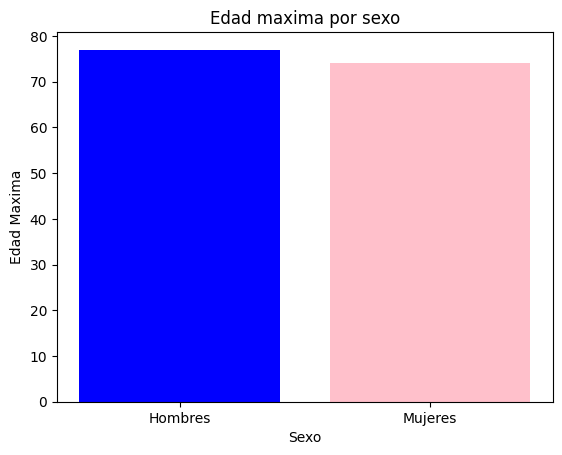

In [15]:
labels = ['Hombres','Mujeres']
edades_maximas = [np.max(edades_hombres),np.max(edades_mujeres)]

plt.bar(labels,edades_maximas,color=['blue','pink'])
plt.title('Edad maxima por sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad Maxima')

plt.show()